### Section A: Importing Data

#### Task 1.

You can use the readtable function to import tabular data from a spreadsheet or text file and store the result as a table.

data = readtable("myfile.xlsx");

This imports the data from the spreadsheet _myfile.xlsx_ and stores it in a table called _data_.

Read the data stored in the file "J.txt" into a variable named _letter_.

In [ ]:
letter = readtable("J.txt");

#### Task 2.

You can use dot notation to refer to any individual variable within a table:

x = mytable.Xdata;

y = mytable.Ydata;

This extracts the variable _Xdata_ from the table _mytable_ and stores the result in a new variable called _x_. Similarly, the variable _Ydata_ is extracted into _y_.

Visualize the letter by plotting the _X_ variable of _letter_ on the horizontal axis and the _Y_ variable on the vertical axis.

In [ ]:
plot(letter.X,letter.Y)

#### Task 3.

The default axis limits distort the aspect ratio of the letter. You can use the axis command to force the axes to preserve the aspect ratio of the data.

Use the command _axis equal_ to correct the aspect ratio of the plot.

In [ ]:
axis equal

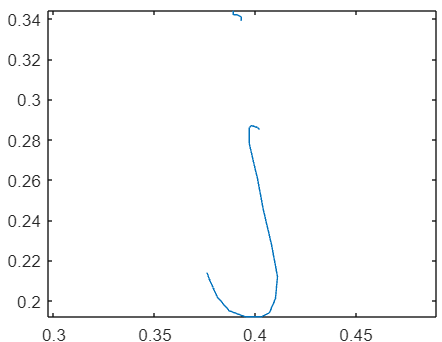

#### Task 4.

Repeat the same importing and plotting tasks for the data in the file "M.txt" and "V.txt".

In [ ]:
letter = readtable("M.txt");
plot(letter.X,letter.Y)
axis equal

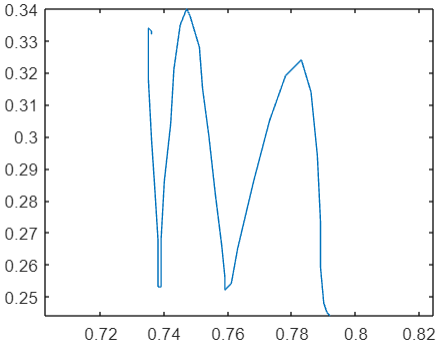

In [ ]:
letter = readtable("V.txt");
plot(letter.X,letter.Y)
axis equal

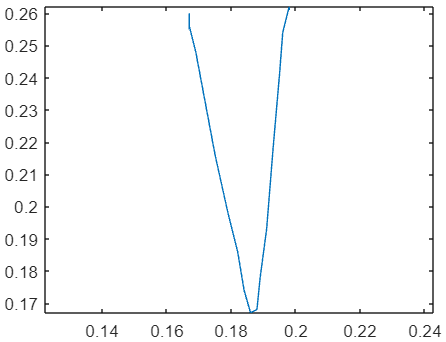

#### Task 5.

You can use dot notation to extract, modify, and reassign variables in a table, just as you would with any variable.

x = x + 3;

data.XVal = data.XVal + 3;

Multiply the values in the _X_ variable of the table _letter_ by the aspect ratio of 1.5. Reassign the result back to _X_ so that _letter_ contains the corrected data.

### Section B: Processing Data

The pen positions for the handwriting data are measured in normalized units (0 to 1). However, the tablet used to record the data is not square. This means a vertical distance of 1 corresponds to 10 inches, while the same horizontal distance corresponds to 15 inches. To correct this, the horizontal units should be adjusted to the range [0 1.5] instead of [0 1].

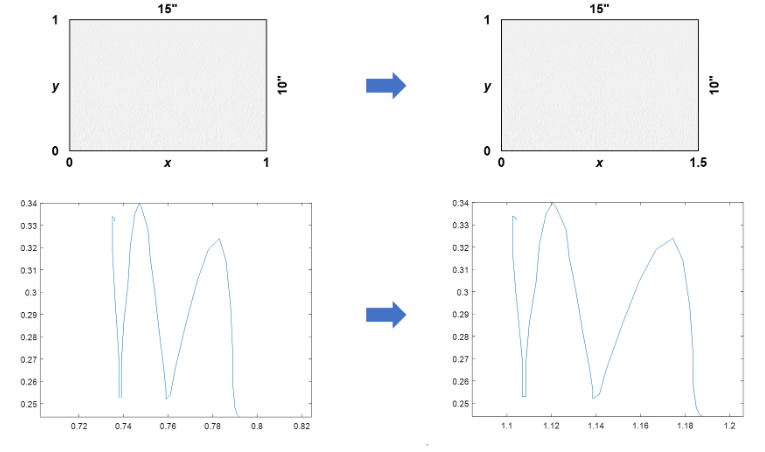

#### Task 5.

You can use dot notation to extract, modify, and reassign variables in a table, just as you would with any variable.

x = x + 3;                                                                                                                   

data.XVal = data.XVal + 3;

Multiply the values in the _X_ variable of the table _letter_ by the aspect ratio of 1.5. Reassign the result back to _X_ so that _letter_ contains the corrected data.

In [ ]:
letter.X = 1.5*letter.X;

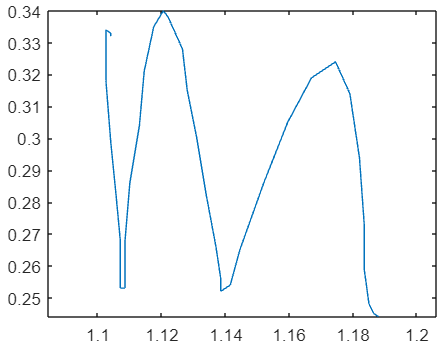

The time values have no physical meaning. They represent the number of milliseconds elapsed form the start of the data collection session. This makes it difficult to interpret plots of pen position through time. A more useful time variable would be duration (measured in seconds) since the beginning of each letter.

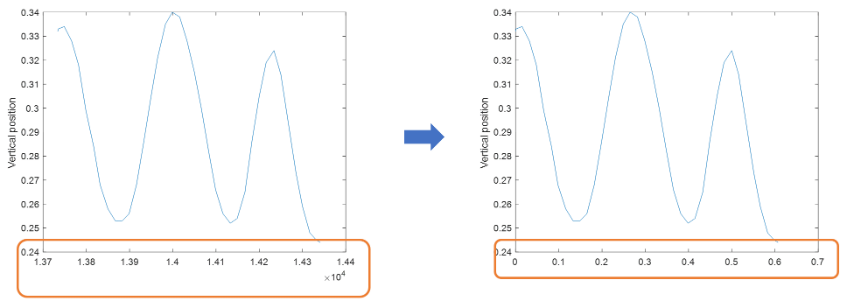

#### Task 6.

You can index into variables in a table, just as you would with any variable.

finalX = data.XVal(end);

Shift the _Time_ variable of the table _letter_ to start at 0 by subtracting the first value from all elements. Divide the result by 1000 to convert to seconds. Reassign the result back to _Time_ so that _letter_ contains the adjusted data.

In [ ]:
letter.Time = letter.Time - letter.Time(1)
letter.Time = letter.Time/1000

plot(letter.Time,letter.X)
plot(letter.Time,letter.Y)

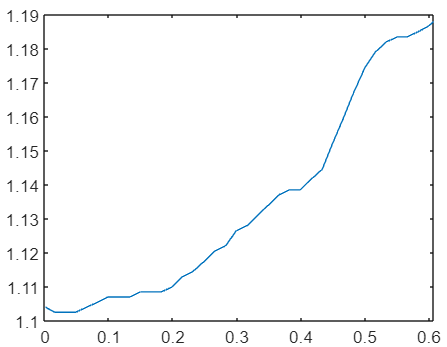
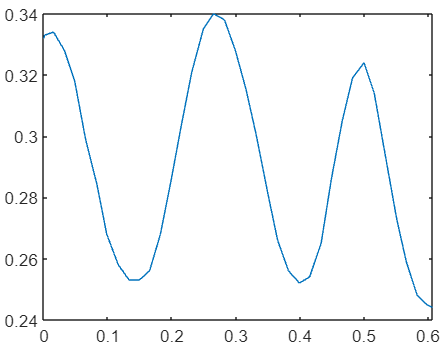

### Section C: Extracting Features

What aspects of these letters could be used to distinguish a "J" from an "M" or a "V"? Instead of using the raw signals, the goal is to compute values that distill the entire signal into simple, useful units of information known as features.

For the letters "J" and "M", a simple feature might be the aspect ratio (the height of the letter relative to the width). A "J" is likely to be tall and narrow, whereas an "M" is likely to be more square.

Compared to "J" and "M", a "V" is quick to write, so the duration of the signal might also be a distinguishing feature.

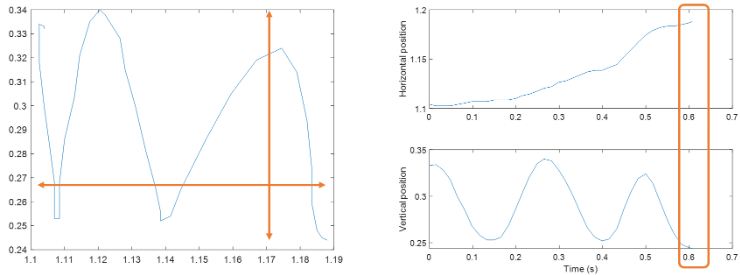

#### Task 7.

A feature is simply a value calculated from the signal, such as its duration.

Calculate the time taken to write the letter by extracting the last value of _letter_. Time and storing the result in a variable called _dur_.

In [ ]:
dur = letter.Time(end)

dur = 0.6080

#### Task 8.

The range function returns the range of values in an array. That is, range(x) is equivalent to max(x) - min(x).

Use the _range_ function to calculate the aspect ratio of the letter by dividing the range of values of _letter.Y_ by the range of values of _letter.X_. Assign the result to a variable called _aratio_.

In [ ]:
aratio = range(letter.Y)/range(letter.X)

aratio = 1.1228

#### Task 9.

The MAT-file _featuredata.mat_ contains a table of the extracted features for 470 letters written by a variety of people. The table features has three variables: _AspectRatio_ and _Duration_ (the two features calculated in the previous section), and _Character_ (the known letter).

Use the _scatter_ function to plot the extracted features, with aspect ratio on the horizontal axis and duration on the vertical axis.

In [ ]:
scatter(features.AspectRatio,features.Duration)

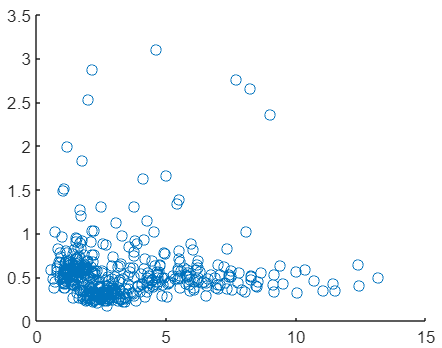

#### Task 10.

It's not clear whether these features are sufficient to distinguish the three letters in the data set (J, M, and V). The _gscatter_ function makes a grouped scatter plot – that is, a scatter plot where the points are colored according to a grouping variable.

_gscatter(x,y,g)_

Use the _gscatter_ function to create the same scatter plot as before but colored according to the letter, which is stored in the _Character_ variable of the table _features_.

gscatter(features.AspectRatio,features.Duration,features.Character)

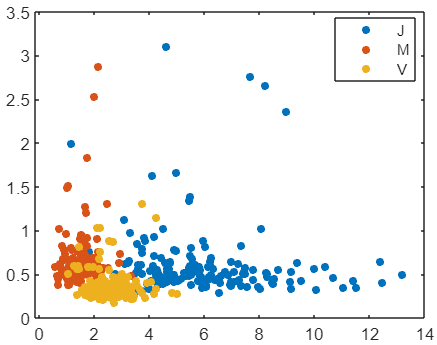

### Section D: Building a Classification Model

A classification model is a partitioning of the space of predictor variables into regions. Each region is assigned one of the output classes. In this simple example with two predictor variables, you can visualize these regions in the plane. 

There is no single absolute “correct” way to partition the plane into the classes J, M, and V. Different classification algorithms result in different partitions.

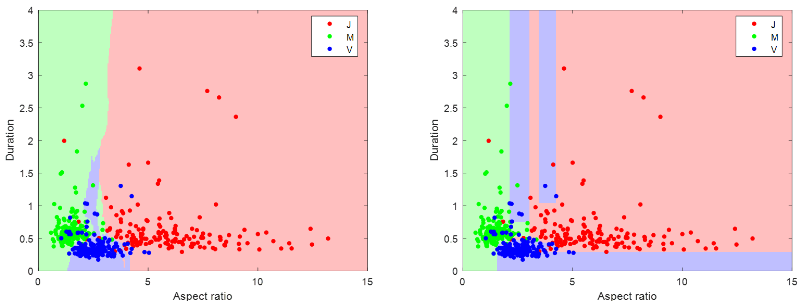

#### Task 11.

A simple model is to classify an observation as the same class as the nearest known examples. This is called a _k-nearest neighbor_ (kNN) model. You can fit a kNN model by passing a table of data to the _fitcknn_ function.

mdl = fitcknn(data,"ResponseVariable");

The second input is the name of the response variable in the table (that is, the class you want the model to predict). The output is a variable containing the fitted model.

The features and the classes for the 470 known examples are stored in the table _features_, which is stored in _featuredata.mat_.

Use the _fitcknn_ function to fit a model to the data stored in _features_. The known classes are stored in the variable called _Character_. Store the resulting model in a variable called _knnmodel_.

In [ ]:
knnmodel = fitcknn(features,"Character")

Having built a model from the data, you can use it to classify new observations. This just requires calculating the features of the new observations and determining which region of the predictor space they are in.

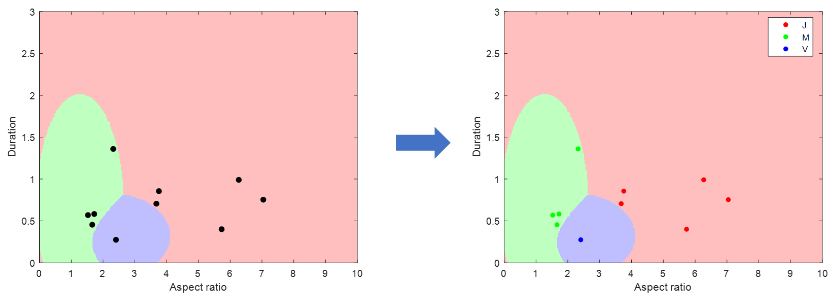

#### Task 12.

The _predict_ function determines the predicted class of new observations.

predClass = predict(model,newdata);

The inputs are the trained model and new observations. The output is a categorical array of the predicted class for each observation in _newdata_.

Typically the new observations are in the form of a table with the same predictor variables as were used to train the model. In this case, however, the model uses two numeric features (the aspect ratio and the duration), so observations can also be provided as a numeric array with two columns.

Use the _predict_ function with the trained model _knnmodel_ to classify a letter with an aspect ratio of 4 and a duration of 1.2. Store the predictions in a variable called _predicted_. Provide the letter features as 2-element row vector.

In [ ]:
predicted = predict(knnmodel,[4,1.2])

predictions = _1x1 categorical array_

    V

By default, _fitcknn_ fits a kNN model with _k_ = 1. That is, the model uses just the single closest known example to classify a given observation. This makes the model sensitive to any outliers in the training data, such as those highlighted in the image above. New observations near the outliers are likely to be misclassified.

You can make the model less sensitive to the specific observations in the training data by increasing the value of _k_ (that is, use the most common class of several neighbors). Often this will improve the model's performance in general. However, how a model performs on any particular test set depends on the specific observations in that set.

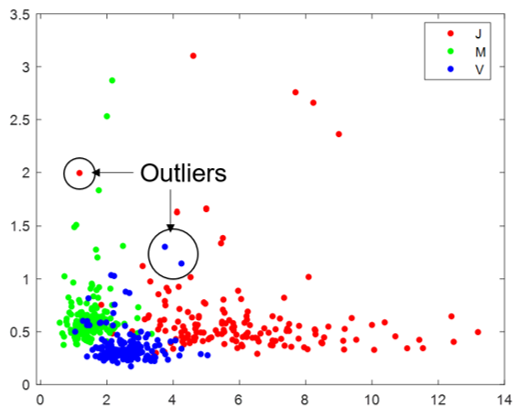

#### Task 13.

You can specify the value of _k_ in a kNN model by setting the _"NumNeighbors"_ property when calling _fitcknn_.

mdl = fitcknn(data,"ResponseVariable",...
"NumNeighbors",10);

Repeat the commands from the previous two tasks, but use the _"NumNeighbors"_ option to change the number of neighbors in the model to 5.

In [ ]:
knnmodel = fitcknn(features,"Character","NumNeighbors",5)
predicted = predict(knnmodel,[4,1.2])

predictions = _1x1 categorical array_

    J

### Section E: Evaluating the Classification Model

#### Task 14.

How good is the kNN model? You can use the model to make predictions but how good are those predictions? Typically you want to test the model by having it make predictions on observations for which you know the correct classification.

The file _featuredata.mat_ contains a table _testdata_ that has the same variables as _features_, including the known classes for the test observations. However, the observations in _testdata_ are not included in _features_. You can use the _predict_ function to determine the kNN model's predictions for the observations in testdata and then compare the predictions to the known classes to see how well the model performs on new data.

Note that the _predict_ function will ignore the _Character_ variable when making predictions from the model.

Use the _predict_ function with the trained model _knnmodel_ to classify the letters in the table _testdata_. Store the predictions in a variable called _predictions_.

In [ ]:
predictions = predict(knnmodel,testdata)

predictions = _10x1 categorical array_

    J
    M
    V
    J
    V
    J
    J
    J
    M
    M

#### Task 15.

The known classes for the test observations are stored in the variable _Character_ in the table _testdata_.

Use the _==_ operator to compare predictions to the known classes. Store the result in a variable called _iscorrect_.

In [ ]:
iscorrect = predictions == testdata.Character

iscorrect = _10x1 logical array_

    1
    1
    1
    1
    0
    0
    1
    1
    1
    1

#### Task 16.

Calculate the proportion of correct predictions by dividing the number of correct predictions by the total number of predictions. Store the result in a variable called _accuracy_. You can use the _sum_ function to determine the number of correct predictions and the _numel_ function to determine the total number of predictions.

In [ ]:
accuracy = sum(iscorrect)/numel(predictions)

accuracy = 0.8000

#### Task 17.

Rather than accuracy (the proportion of correct predictions), a commonly-used metric to evaluate a model is _misclassification rate_ (the proportion of incorrect predictions).

Use the _~=_ operator to determine the misclassification rate. Store the result in a variable called _misclassrate_.

In [ ]:
iswrong = predictions ~= testdata.Character
misclassrate = sum(iswrong)/numel(predictions)

misclassrate = 0.2000

#### Task 18.

Accuracy and misclassification rate give a single value for the overall performance of the model, but it can be useful to see a more detailed breakdown of which classes the model confuses. A _confusion matrix_ shows the number of observations for each combination of true and predicted class.

A confusion matrix is commonly visualized by shading the elements according to their value. Often the diagonal elements (the correct classifications) are shaded in one color and the other elements (the incorrect classifications) in another color. You can visualize a confusion matrix by using the _confusionchart_ function.

confusionchart(ytrue,ypred);

where _ytrue_ is a vector of the known classes and _ypred_ is a vector of the predicted classes.

Use the _confusionchart_ function to compare predictions to the known labels (stored in the variable _Character_ in the table _testdata_).

In [ ]:
confusionchart(testdata.Character,predictions);

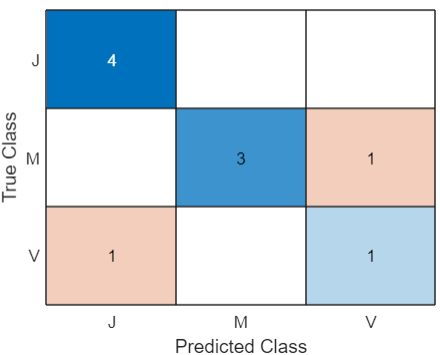

### Section F: Creating Datastores

Samples of each letter were collected from many different volunteers. Some provided more than one sample of each letter. Each sample was saved in a separate file and all the files were stored in one folder. The file names have the form

user003_B_2.txt

This file would contain the second sample of the letter _B_ written by the volunteer designated _“user003”_.

#### Task 19.

You can use wildcards to make a datastore to files or folders matching a particular pattern.

ds = datastore("data*.xlsx");

The handwriting data files have names of the form user003_B_2.txt.

Use the _datastore_ function to make a datastore to all files containing the letter _M_. These files have _M_ in their name and a .txt extension. Store the datastore in a variable called _letterds_.

In [ ]:
letterds = datastore("*_M_*.txt")

#### Task 20.

You can use the _read_ function to import the data from a file in the datastore.

data = read(ds);

Using the _read_ function the first time will import the data from the first file. Using it a second time will import the data from the second file, and so on.

Import the data from the first file into a table called _data_.

In [ ]:
data = read(letterds)

#### Task 21.

Visualize the data by plotting the _X_ variable of _data_ on the horizontal axis and the _Y_ variable on the vertical axis.

In [ ]:
plot(data.X,data.Y)

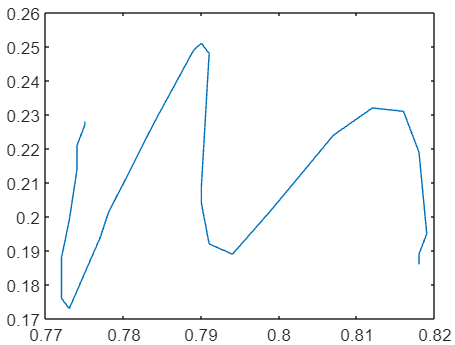

#### Task 22.

Calling the _read_ function again imports the data from the next file in the datastore.

Import and plot the data from the second file.

In [ ]:
data = read(letterds)
plot(data.X,data.Y)

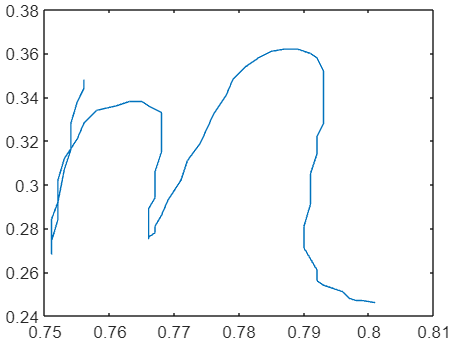

#### Task 23.

The _readall_ function imports the data from all the files in the datastore into a single variable.

Use the _readall_ function to import the data from all the files into a table called _data_. Visualize the data by plotting _Y_ against _X_.

In [ ]:
data = readall(letterds)
plot(data.X,data.Y)

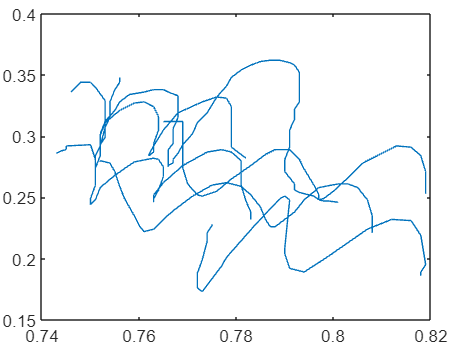

### Section G: Adding a Data Transformation

Typically you will want to apply a series of preprocessing operations to each sample of your raw data. The first step to automating this procedure is to make a custom function that applies your specific preprocessing operations.

#### Task 24.

You can add a custom function at the end of your script. For data preprocessing, the function should take the data returned from the datastore as input. It should return the transformed data as output.

function dataout = functionName(datain)
    % do something with datain
    dataout = ...
end

Create a function called _scale_ at the end of the script that performs the following operations:

data.Time = (data.Time - data.Time(1))/1000;
data.X = 1.5 * data.X;

Because these commands modify the variable _data_ directly, your function should use _data_ as both the input and output variable.

Note that the third line of the script calls the _scale_ function. Your script won't run until this function has been created.

Also note that local functions must be at the end of a script. This means you will be editing the script sections out of order in this interaction. The section headings show which section of the script to edit in each task.

In [ ]:
function data = scale(data)
data.Time = (data.Time - data.Time(1))/1000;
data.X = 1.5*data.X;
end

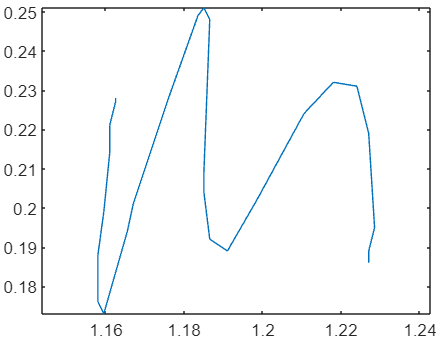
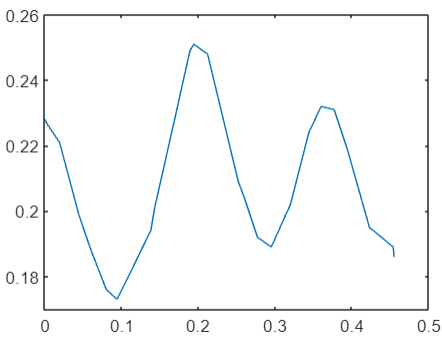

Currently, you still need to call your function manually. To automate your data importing and preprocessing, you want your datastore to apply this function whenever the data is read. You can do this with a transformed datastore. The transform function takes a datastore and a function as inputs. It returns a new datastore as output. This transformed datastore applies the given function whenever it imports data.

#### Task 25.

To use a function as an input to another function, create a _function handle_ by adding the @ symbol to the beginning of the function name.

transform(ds,@myfun)

A function handle is a reference to a function. Without the @ symbol, MATLAB will interpret the function name as a call to that function.

Use the _transform_ function to create a transformed datastore called _preprocds_. This datastore should apply the _scale_ function to the data referenced by _letterds_.

In [ ]:
preprocds = transform(letterds,@scale)

#### Task 26.

The _scale_ function should now be applied automatically whenever data is read from the _preprocds_ datastore.

Use the _readall_ function to import all the data. Check that the preprocessing function was applied to each file by plotting the _Y_ variable as a function of _Time_.

In [ ]:
data = readall(preprocds)
plot(data.Time,data.Y)

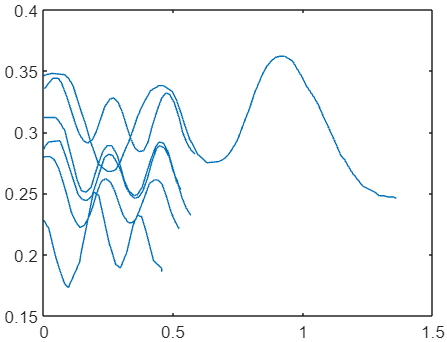

The location of a letter is not important for classifying it. What matters is the shape. A common preprocessing step for many machine learning problems is to normalize the data.

Typical normalizations include shifting by the mean (so that the mean of the shifted data is 0) or shifting and scaling the data into a fixed range (such as [-1, 1]). In the case of the handwritten letters, shifting both the x and y data to have 0 mean will ensure that all the letters are centered around the same point.

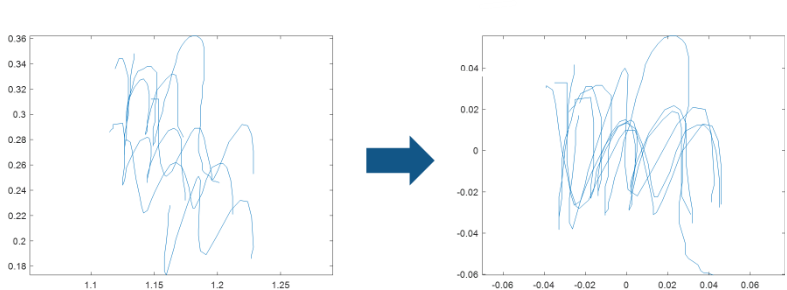

#### Task 27.

Modify the _scale_ function to subtract the mean position from both components:

data.X = data.X - mean(data.X);
data.Y = data.Y - mean(data.Y);

Note that this will introduce a problem that will make the plot appear blank. You will fix this in the next task.

In [ ]:
function data = scale(data)
data.Time = (data.Time - data.Time(1))/1000;
data.X = 1.5*data.X;
data.X = data.X - mean(data.X);
data.Y = data.Y - mean(data.Y);
end

#### Task 28.

Any calculations (including the default use of functions such as _mean_) involving NaNs will result in NaN. This is important in machine learning, where you often have missing values in your data. In the handwriting data, a NaN occurs wherever the writer lifted the pen from the tablet.

You can use the "_omitnan_" option to have statistical functions like mean ignore missing values.

mean(x,"omitnan")

Add the "_omitnan_" option to the calls to _mean_ in the _scale_ function.

In [ ]:
function data = scale(data)
data.Time = (data.Time - data.Time(1))/1000;
data.X = 1.5*data.X;
data.X = data.X - mean(data.X,"omitnan");
data.Y = data.Y - mean(data.Y,"omitnan");
end

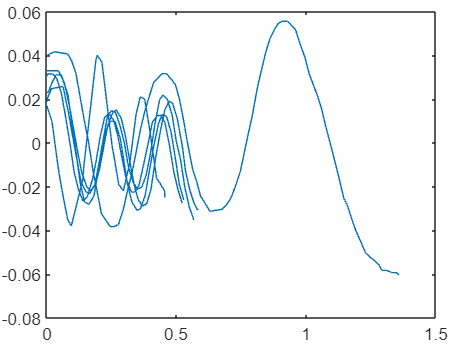

# Section H: Quantifying Letter Shapes

The handwriting samples have all been shifted so they have zero mean in both horizontal and vertical position. What other statistics could provide information about the shape of the letters? Different letters will have different distributions of points. Statistical measures that describe the shape of these distributions could be useful features.

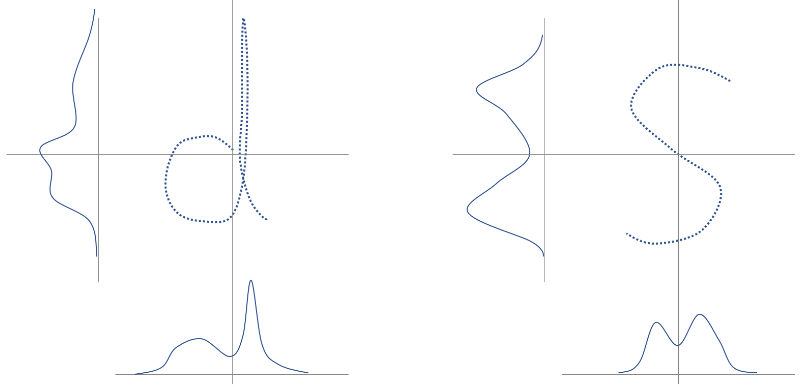

#### Task 29.

The MAT-file sampleletters.mat contains tables _b1_, _b2_, _d1_, _d2_, _m1_, _m2_, _v1_, and _v2_ that hold the data for some specific examples selected from the full handwriting data set.

Use the _range_ function to calculate the aspect ratio of the letter _b1_ by dividing the range of values of _Y_ by the range of values of _X_. Assign the result to a variable called _aratiob_.

In [ ]:
aratiob = range(b1.Y)/range(b1.X)

aratiob = 2.0952

#### Task 30.

The letters are preprocessed to have a mean of 0 (in both X and Y). The median is less sensitive to outliers than the mean. Comparing the mean to the median can give an idea of how asymmetric a distribution is.

Use the _median_ function to calculate the median of _b1.X_ and _b1.Y_. Store the results in variables called _medxb_ and _medyb_, respectively. Remember to use the "_omitnan_" flag.

In [ ]:
medxb = median(b1.X,"omitnan")
medyb = median(b1.Y,"omitnan")

medxb = -0.0538 <br> 
medyb = -0.0336 

#### Task 31.

The spread of values can be measured with the mean absolute deviation (MAD), standard deviation, and variance. Each of these calculate the average of some measure of the deviation from the mean.

Use the _mad_ function to calculate the mean absolute deviation of _b1.X_ and _b1.Y_. Store the results in variables called _devxb_ and _devyb_, respectively. Note that _mad_ ignores NaNs by default.

In [ ]:
devxb = mad(b1.X)
devyb = mad(b1.Y)

devxb = 0.1519 <br>
devyb = 0.4195

#### Task 32.

Calculate the same statistics for some other sample letters:
- The aspect ratio of _v1_, stored in _aratiov_
- The median of _d1.X_, stored in _medxd_
- The median of _d1.Y_, stored in _medyd_
- The mean absolute deviation of _m1.X_, stored in _devxm_
- The mean absolute deviation of _m1.Y_, stored in _devym_

In [ ]:
aratiov = range(v1.Y)/range(v1.X)
medxd = median(d1.X,"omitnan")
medyd = median(d1.Y,"omitnan")
devxm = mad(m1.X)
devym = mad(m1.Y)

aratiov = 1.5942 <br>
medxd = 0.0431 <br>
medyd = 0.0184 <br>
devxm = 0.2865 <br>
devym = 0.2560 <br>

# Section I: Finding Peaks

#### Task 33.

Local minima and maxima are often important features of a signal. The _islocalmin_ and _islocalmax_ functions take a signal as input and return a logical array the same length as the signal.

idx = islocalmin(x);

The value of _idx_ is true whenever the corresponding value in the signal is a local minimum.

Use the _islocalmin_ and _islocalmax_ functions to create two logical arrays, _idxmin_ and _idxmax_, respectively, that determine the local minima and maxima of _m1.X_.

In [ ]:
idxmin = islocalmin(m1.X)
idxmax = islocalmax(m1.X)

plot(m1.Time,m1.X)
hold on
plot(m1.Time(idxmin),m1.X(idxmin),"o")
plot(m1.Time(idxmax),m1.X(idxmax),"s")
hold off

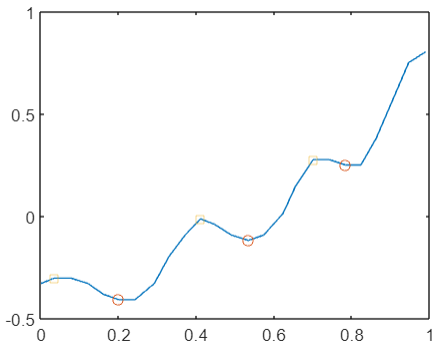

#### Task 34.

Local minima and maxima are defined by computing the _prominence_ of each value in the signal. The prominence is a measure of how a value compares to the other values around it. You can obtain the prominence value of each point in a signal by obtaining a second output from _islocalmin_ or _islocalmax_.

[idx,p] = islocalmin(x);

Determine the prominence values for _islocalmin(m1.X)_. Store the result in a variable called _prom_. Plot the prominence as a function of the _Time_ variable of _m1_.

In [ ]:
[idx,prom] = islocalmin(m1.X);
plot(m1.Time,prom)

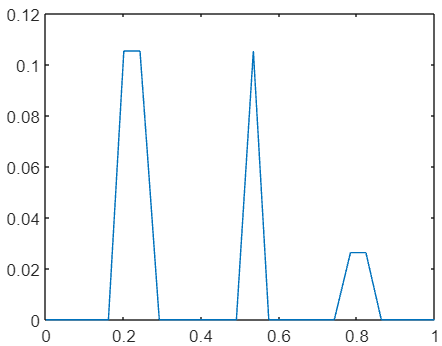

#### Task 35.

By default, _islocalmin_ and _islocalmax_ find points with any prominence value above 0. This means that a maximum is defined as any point that is larger than the two values on either side of it. For noisy signals you might want to consider only minima and maxima that have a prominence value above a given threshold.

idx = islocalmin(x,"MinProminence",threshvalue)

When choosing a threshold value, note that prominence values can range from 0 to _range(x)_.

Recalculate _idxmin_ and _idxmax_ for _m1.X_ using a minimum prominence threshold of 0.1.

In [ ]:
idxmin = islocalmin(m1.X,"MinProminence",0.1)
idxmax = islocalmax(m1.X,"MinProminence",0.1)

plot(m1.Time,m1.X)
hold on
plot(m1.Time(idxmin),m1.X(idxmin),"o")
plot(m1.Time(idxmax),m1.X(idxmax),"s")
hold off

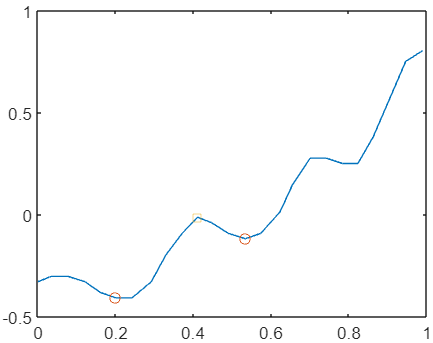

# Section J: Computing Derivatives

An important aspect of detecting letters written on a tablet is that there is useful information in the rhythm and flow of how the letters are written. To describe the shape of the signals through time, it can be useful to know the velocity of the pen, or, equivalently, the slope of the graph of position through time.

The raw data recorded from the tablet has only position (not velocity) through time, so velocity must be calculated from the raw data. With discrete data points, this means estimating the velocity by using a _finite difference_ approximation $v=Δx/Δt$.

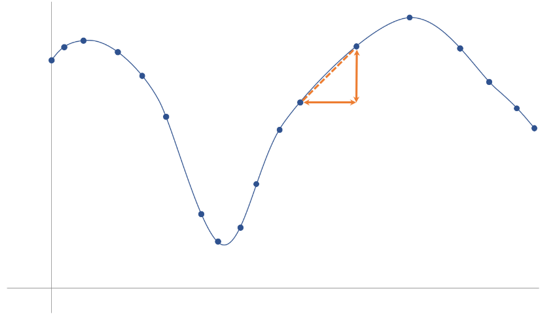

#### Task 36.

The _diff_ function calculates the difference between successive elements of an array. That is, if y = diff(x), then $y1 = x2 − x1$, $y2 = x3 − x2$, and so on. Note that _y_ will be one element shorter than _x_.

Use the _diff_ function to find the differences between the elements of _m2.X_. Store the result in a variable called _dX_. Similarly, find the differences between the elements of _m2.Time_ and store the result in a variable called _dT_.

In [ ]:
dX = diff(m2.X);
dT = diff(m2.Time);

#### Task 37.

Calculate the approximate derivative of _m2.X_ by dividing _dX_ by _dT_. Remember to use the array division operator. Store the result in a variable called _dXdT_.

In [ ]:
dXdT = dX./dT;

#### Task 38.

Recall that the output from the _diff_ function is one element shorter than the input.

Plot _dXdT_ as a function of _m2.Time_, excluding the final value. Recall that you can use the _end_ keyword to refer to the last element in an array.

In [ ]:
plot(m2.Time(1:end-1),dXdT)

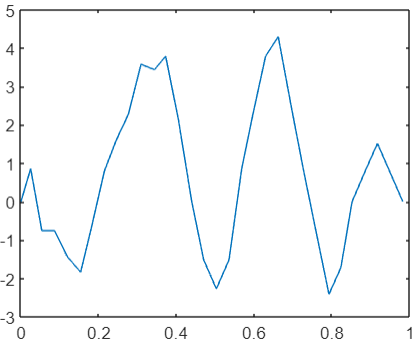

#### Task 39.

Calculate the approximate derivative of _m2.Y_. Store the result in a variable called _dYdT_. Calculate the maximum values of both _dXdT_ and _dYdT_. Store the results in variables called _maxdx_ and _maxdy_, respectively.

You might want to leave off the semicolons so that you can see the values of _maxdx_ and _maxdy_.

In [ ]:
maxdx = max(dXdT)
dYdT = diff(m2.Y)./dT;
maxdy = max(dYdT)

maxdx = 4.2971 <br>
maxdy = Inf

#### Task 40.

Due to limits on the resolution of the data collection procedure, the data contains some repeated values. If the position and the time are both repeated, then the differences are both 0, resulting in a derivative of 0/0 = NaN. However, if the position values are very slightly different, then the derivative will be Inf (nonzero divided by 0).

Note that _max_ ignores NaN but not Inf because Inf is larger than any finite value. However, for this application, both NaN and Inf can be ignored, as they represent repeated data.

You can use the _standardizeMissing_ function to convert a set of values to NaN (or the appropriate missing value for nonnumeric data types).

xclean = standardizeMissing(x,0);

Here, _xclean_ will be the same as _x_ (including any NaNs), but will have NaN wherever _x_ had the value 0.

Use the _standardizeMissing_ function to modify _dYdT_ so that all values of Inf are now NaN.

In [ ]:
dYdT = standardizeMissing(dYdT,Inf);
maxdy = max(dYdT)

maxdy = 7.1619

# Section K: Calculating Correlations

The pair of signals on the left have a significantly different shape to the pair of signals on the right. However, the relationship between the two signals in each pair is similar in both cases: in the blue regions, the upper signal is increasing while the lower signal is decreasing, and vice versa in the yellow regions. _Correlation_ attempts to measure this similarity, regardless of the shape of the signal.

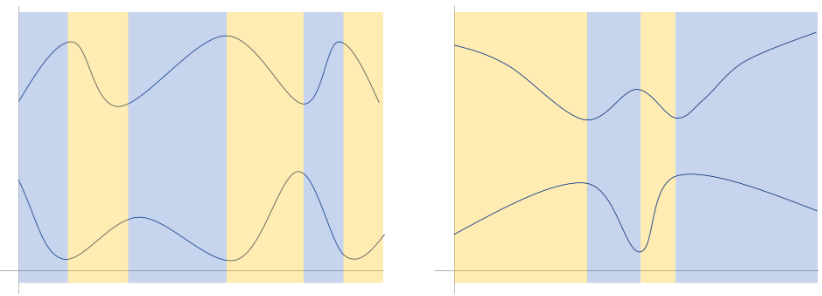

For the first half of the letter V, the horizontal and vertical positions have a strong negative linear correlation: when the horizontal position increases, the vertical position decreases proportionally. Similarly, for the second half, the positions have a strong positive correlation: when the horizontal position increases, the vertical position also increases proportionally.

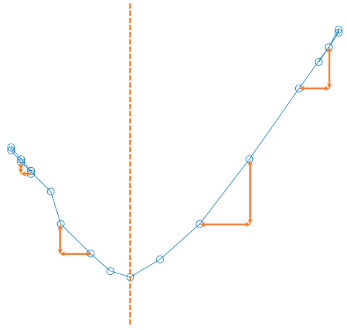

#### Task 41.

The _corr_ function calculates the linear correlation between variables.

C = corr(x,y);

Use the _corr_ function to calculate the linear correlation between _v2.X_ and _v2.Y_. Store the result in a variable called _C_.

In [ ]:
C = corr(v2.X,v2.Y)

C = NaN

#### Task 42.

Because both variables contain missing data, _C_ is NaN. You can use the "_Rows_" option to specify how to avoid missing values.

C = corr(x,y,"Rows","complete");

Recalculate the correlation between _v2.X_ and _v2.Y_, this time with the "_Rows_" option set to "_complete_". Store the result in _C_.

In [ ]:
C = corr(v2.X,v2.Y,"Rows","complete")

C = 0.6493

#### Task 43.

The correlation coefficient is always between -1 and +1.
- A coefficient of -1 indicates a perfect negative linear correlation
- A coefficient of +1 indicates a perfect positive linear correlation
- A coefficient of 0 indicates no linear correlation

In this case, there is only a moderate correlation because the calculation has been performed on the entire signal. It may be more informative to consider the two halves of the signal separately.

Use concatenation ([ ]) to make a matrix _M_ with four columns: the first half (elements 1 to 11) of _v2.X_, the first half of _v2.Y_, the second half (elements 12 to 22) of _v2.X_, the second half of _v2.Y_.

In [ ]:
M = [v2.X(1:11) v2.Y(1:11) v2.X(12:22) v2.Y(12:22)]

#### Task 44.

To calculate the correlation between each pair of several variables, you can pass a matrix to the _corr_ function, where each variable is a column of the matrix.

M = [x y z];
C = corr(M);

Use the _corr_ function to calculate the correlations between the columns of _M_. Store the result in a variable called _Cmat_. Don't forget to ignore missing values.

In [ ]:
Cmat = corr(M,"Rows","complete")

# Section L: Creating a Feature Extraction Function

Once you have determined the features you want to extract, you will need to apply the appropriate calculations to every sample in your data set. The first step to automating this procedure is to make a custom function that takes the data as input and returns an array of features as output.

#### Task 45.

Currently the script calculates six features for a given letter (stored in the variable _letter_. The six features are stored in six separate variables.

You can use the _table_ function to combine separate variables into a table.

T = table(x,y,z);

Use the _table_ function to make a table from the features stored in the variables _aratio_, _numXmin_, _numYmax_, _avgdX_, _avgdY_, and _corrXY_. Store the result in a variable called _feat_.

In [ ]:
feat = table(aratio,numXmin,numYmax,avgdX,avgdY,corrXY)

#### Task 46.

By default, the table constructed with the _table_ function has default variable names. To make a table with more useful names, use the 'VariableNames' option.

T = table(x,y,z,'VariableNames',["X","Y","Z"]);

Typically you can use either single or double quotes to specify option names. However, because strings can represent data for your table, you need to use single quotes when specifying the 'VariableNames' option.

Recreate the table of features, _feat_, but with the table variable names stored in the array _featurenames_.

In [ ]:
feat = table(aratio,numXmin,numYmax,avgdX,avgdY,corrXY,'VariableNames',featurenames)

#### Task 47.

At the end of the script, add a local function called _extract_ that takes a single variable, _letter_, as input and returns a table of features, _feat_, as output. Test your function by calling it with _b2_ as input. Store the result in a variable called _featB2_.

In [ ]:
featB2 = extract(b2)

function feat = extract(letter)
aratio = range(letter.Y)/range(letter.X);
idxmin = islocalmin(letter.X,"MinProminence",0.1);
numXmin = nnz(idxmin);
idxmax = islocalmax(letter.Y,"MinProminence",0.1);
numYmax = nnz(idxmax);
dT = diff(letter.Time);
dXdT = diff(letter.X)./dT;
dYdT = diff(letter.Y)./dT;
avgdX = mean(dXdT,"omitnan");
avgdY = mean(dYdT,"omitnan");
corrXY = corr(letter.X,letter.Y,"rows","complete");

featurenames = ["AspectRatio","NumMinX","NumMinY","AvgU","AvgV","CorrXY"];

feat = table(aratio,numXmin,numYmax,avgdX,avgdY,corrXY,'VariableNames',featurenames);
end

# Section M: Extracting Features from Multiple Data Files

To automate your feature extraction, you want your datastore to apply your extraction function whenever the data is read. As with preprocessing, you can do this with a transformed datastore.

#### Task 48.

From the raw data, you will typically need to apply both preprocessing and feature extraction functions. You can apply the _transform_ function repeatedly to add any number of transformations to the datastore to the raw data.

The script currently applies the _scale_ function to the files in the datastore _letterds_. The transformed datastore is stored in the variable _preprocds_.

Use the _transform_ function to apply the _extract_ function to the datastore _preprocds_. Store the result in a variable called _featds_.

In [ ]:
featds = transform(preprocds,@extract)

#### Task 49.

Use the _readall_ function to read, preprocess, and extract features from all the data files. Store the result in a variable called _data_.

There are 12 files and the _extract_ function calculates six features for each. Hence, _data_ should be a 12-by-6 table.

Visualize the imported data by making a scatter plot of _AspectRatio_ on the x-axis and _CorrXY_ on the y-axis.

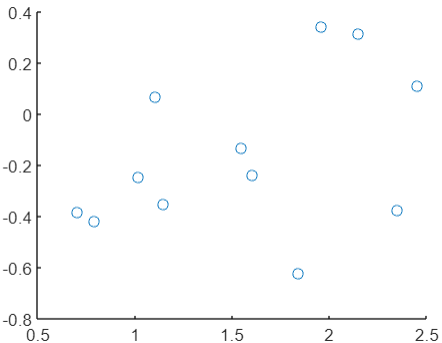

#### Task 50.

The letters that the data represents are given in the data file _names_, which are of the form _usernnn_X_n.txt_. Note that the letter name appears between underscore characters (_X_).

You can use the _extractBetween_ function to extract text that occurs between given strings.

extractedtxt = extractBetween(txt,"abc","xyz")

If _txt_ is the string array ["hello abc 123 xyz","abcxyz","xyzabchelloxyzabc"], then extractedtxt will be [" 123 ","","hello"].

Use the _extractBetween_ function to obtain the known letter names from the file names by looking for text between two underscore characters. Store the result in a variable called _knownchar_. Recall that the file names are stored in the _Files_ property of the datastore _letterds_.

In [ ]:
knownchar = extractBetween(letterds.Files,"_","_")

#### Task 51.

For classification problems, you typically want to represent the known label as a categorical variable. You can use the _categorical_ function to convert an array to categorical type.

xcat = categorical(x)

By default, the unique values in _x_ will be used to define the set of categories.

Use the _categorical_ function to make _knownchar_ categorical.

In [ ]:
knownchar = categorical(knownchar)

knownchar = _categorical array_

    M
    V
    M
    V
    M
    M
    V
    V
    M
    M
    V
    V

#### Task 52.

It is convenient to have the known classes associated with the training data. Recall that you can create new variables in a table by assigning to a variable using dot notation.

T.newvar = workspacevar

Add _knownchar_ to the table _data_ as a new variable called _Character_.

Use the _gscatter_ function to make a grouped scatter plot of _AspectRatio_ on the x-axis and _CorrXY_ on the y-axis, grouped by _Character_.

In [ ]:
data.Character = knownchar
gscatter(data.AspectRatio,data.CorrXY,data.Character)

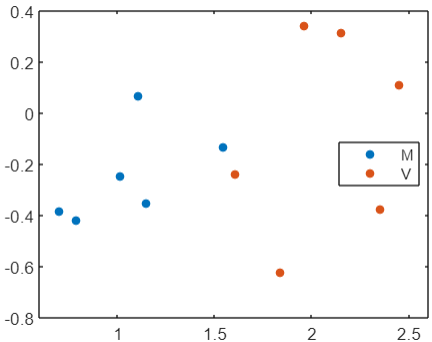

# Section N: Training a Model

The MAT-file _letterdata.mat_ contains the table _traindata_ which represents feature data for 2906 samples of individual letters. There are 25 features, including statistical measures, correlations, and maxima/minima for the position, velocity, and pressure of the pen.

#### Task 53.

The Classification Learner app lets you explore, train, and evaluate different classification methods.

Click __New Session__. Check that the training data is _traindata_ and that the response variable is _Character_. Click __Start Session__.

#### Task 54.

If you're not sure what model to choose, you can start by training all models that are quick to train.

Select __All Quick-To-Train__ from the __Models__ section.

#### Task 55.

You can train your models by clicking on the __Train All__ button.

Click __Train All__ to train your models.

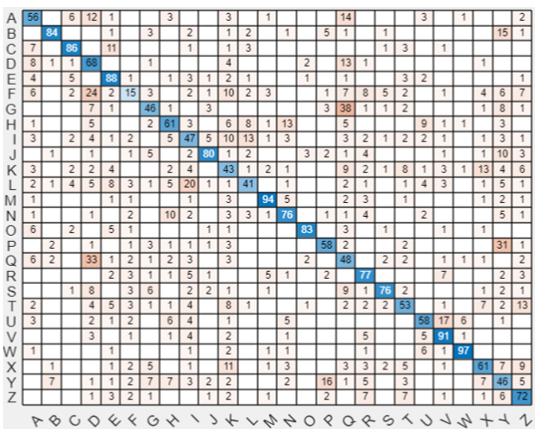

#### Task 56.

Notice that the best performing model is 2.9 Weighted KNN. You can further tune this model by modifying its parameters.

Create a new __Weighted KNN__ model from the __Models__ section in the toolstrip. Change the Number of Neighbors to 5 and train the model.

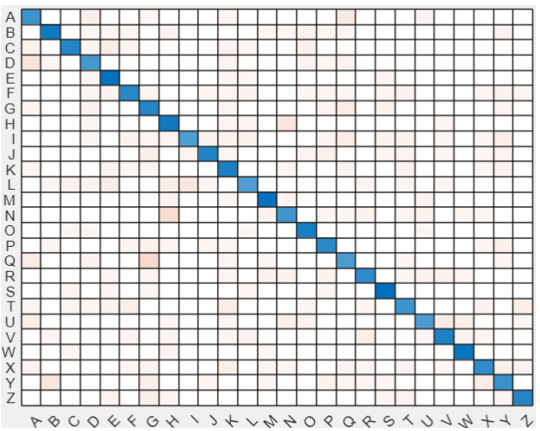

#### Task 57.

The performance slightly improved for this model. Look at the confusion matrix. Can you see which letters are not predicted properly?

You can further explore individual missclassifications through a scatter plot.

Select Model 3 KNN. Plot the data for this model by clicking __Scatter__ from the Plot and __Interpret__ section of the toolstrip.

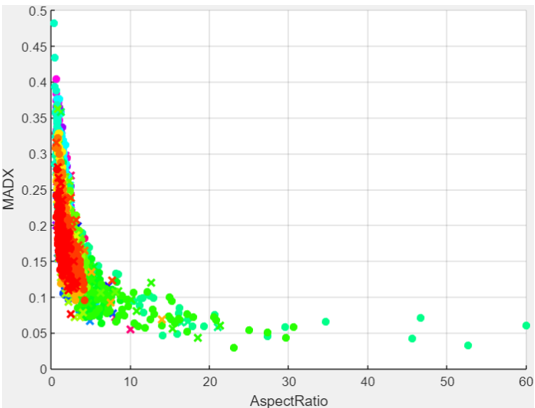

# Section O: Making Predictions

#### Task 58.

The MAT-file _letterdata.mat_ contains _traindata_, the table of data used to train the model _knnmodel_. It also contains _testdata_ which is a table of data (with the same features as _traindata_) that the model has never seen before.

Recall that you can use the _predict_ function to obtain a model's predictions for new data.

preds = predict(model,newdata)

Use the _predict_ function to obtain the model's predictions for the test data. Store the result in a variable called _predLetter_.

In [ ]:
predLetter = predict(knnmodel,testdata)

#### Task 59.

In this case, the correct classes for the test data are known. They are stored in the _Character_ variable of the table _testdata_.

Use the _~=_ operator to determine the misclassification rate (the number of incorrect predictions divided by the total number of predictions). Store the result in a variable called _misclassrate_.

In [ ]:
misclassrate = sum(predLetter ~= testdata.Character)/numel(predLetter)

misclassrate = 0.1674

#### Task 60.

The response classes are not always equally distributed in either the training or test data. _Loss_ is a fairer measure of misclassification that incorporates the probability of each class (based on the distribution in the data).

loss(model,testdata)

Use the _loss_ function to determine the test data loss for the kNN model _knnmodel_. Store the result in a variable called _testloss_.

In [ ]:
testloss = loss(knnmodel,testdata)

testloss = 0.1645

# Section P: Identifying Common Misclassifications

#### Task 61.

When making a confusion chart, you can add information about the false negative and false positive rate for each class by adding row or column summaries, respectively.

confusionchart(...,"RowSummary","row-normalized");

Recreate the confusion chart with normalized row summary information.

In [ ]:
confusionchart(testdata.Character,predLetter,"RowSummary","row-normalized");

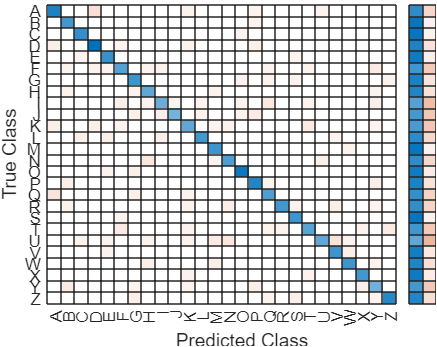

With 26 letters, you will need to enlarge the confusion chart to make the values visible. If you open the plot in a separate figure, you can resize it as large as you like.

The row summary shows the false negative rate for each class. This shows which letters the kNN model has the most difficulty identifying (i.e., the letters the model most often thinks are something else.)

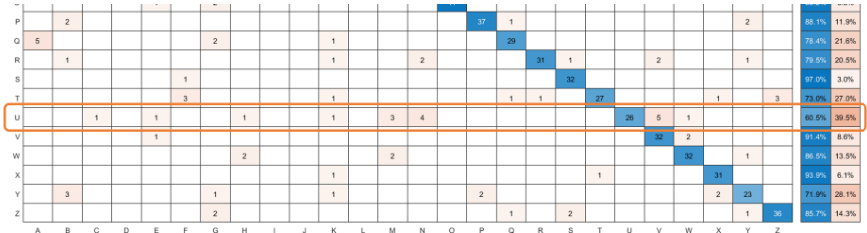

This model has particular difficulty with the letter U, most often mistaking it for M, N, or V.

Some confusions seem reasonable, such as U/V or H/N. Others are more surprising, such as U/K. Having identified misclassifications of interest, you will probably want to look at some the specific data samples to understand what is causing the misclassification.

#### Task 62.

You can use relational and logical operators (such as ==, ~=, &, and |) to identify observations to study further.

Use relational and logical operators to create a logical array called _falseneg_ that identifies instances of the test data where the letter U was classified as something else. That is, elements where the true class (_testdata.Character_) is "U" and the predicted class (_predLetter_) was not "U".

In [ ]:
falseneg = (testdata.Character == "U") & (predLetter ~= "U");

#### Task 63.

Recall that the _Files_ property of a datastore contains the file names of the original data. Hence, when you import the data and extract the features, you can keep a record of which data file is associated with each observation. The string array _testfiles_ contains the file names for the test data.

Use the logical array _falseneg_ as an index into _testfiles_ to determine the file names of the observations that were incorrectly classified as the letter U. Store the result in a variable called _fnfiles_.

Similarly, use _falseneg_ as an index into _predLetter_ to determine the associated predicted letters. Store the result in a variable called _fnpred_.

In [ ]:
fnfiles = testfiles(falseneg)
fnpred = predLetter(falseneg)

fnpred = "_12x1 categorical array_"

    W
    M
    K
    N
    N
    V
    N
    V
    C
    V
    E
    M
    H
    N
    V
    V
    M

#### Task 64.

The fourth element of _fnpred_ is N, which is a common misclassification for the letter U. What does this particular sample look like?

Use the _readtable_ function to import the data in the fourth element of _fnfiles_ into a table called _badU_. Visualize the letter by plotting _Y_ against _X_.

In [ ]:
badU = readtable(fnfiles(4));
plot(badU.X,badU.Y)

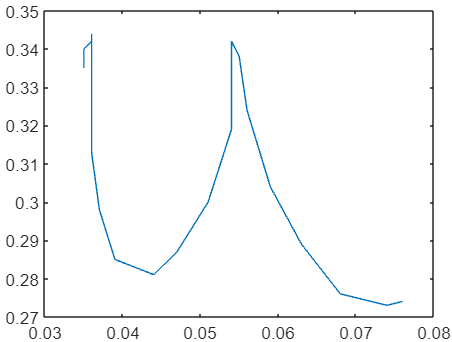

# Section Q: Investigating Features

#### Task 65.


Having identified examples of interest, you will typically want to examine the corresponding features.

Use logical indexing to extract the training data for just the letters N and U. Store the result in a table called _UorN_.

Similarly, extract the test data where the letter U was misclassified (i.e., the false negatives for U). Store the result in a table called _fnU_.

In [ ]:
idx = (traindata.Character == "N") | (traindata.Character == "U");
UorN = traindata(idx,:)

idx = (testdata.Character == "U") & (predLetter ~= "U");
fnU = testdata(idx,:)

#### Task 66.

Categorical variables maintain the full list of possible classes, even when only a subset are present in the data. When examining a subset, it can be useful to redefine the set of possible classes to only those that are in the data. The _removecats_ function removes unused categories.

cmin = removecats(cfull)

Use the _removecats_ function to remove unused categories from _UorN.Character_. Assign the result back to _UorN.Character_.

In [ ]:
UorN.Character = removecats(UorN.Character);

#### Task 67.

You can use curly braces ({ }) to extract data from a table into an array of a single type.

datamatrix = datatable{1:10,4:6}

This extracts the first 10 elements of variables 4, 5, and 6. If these variables are numeric, _datamatrix_ will be a 10-by-3 double array.

Extract the numeric feature data from _UorN_ and _fnU_ into matrices called _UorNfeat_ and _fnUfeat_, respectively.

Note that the last variable in both tables is the response. All other variables are the features.

In [ ]:
UorNfeat = UorN{:,1:end-1};
fnUfeat = fnU{:,1:end-1};

#### Task 68.

A _parallel coordinates_ plot shows the value of the features (or “coordinates”) for each observation as a line.

parallelcoords(data)

To compare the feature values of different classes, use the "_Group_" option.

parallelcoords(data,"Group",classes)

Use the _parallelcoords_ function to plot the features in the training data (_UorNfeat_), grouped by letter (_UorN.Character_).

In [ ]:
parallelcoords(UorNfeat,"Group",UorN.Character)

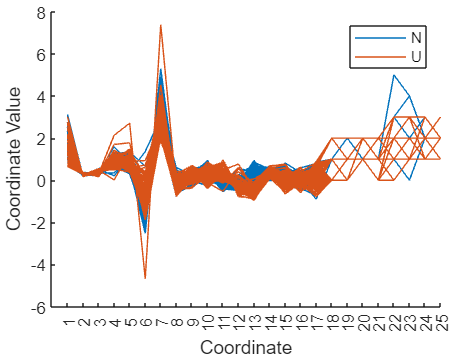

#### Task 69.

Because a parallel coordinates plot is just a line plot, you can add individual observations using the regular plot function.

Use the _plot_ function to add the values of the features for the fourth misclassified U to the plot as a black line. (The features for the misclassified letters are stored in the matrix _fnUfeat_).

In [ ]:
hold on
plot(fnUfeat(4,:),"k")
hold off

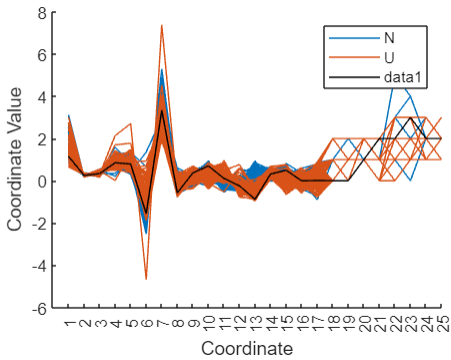